In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('TESTE_FRAME_SOLDAGEM_ETAPA_002_J.xls')

In [3]:
df.head()

,Tempo,Amperagem,Situação
0,09:24:50,0,parado
1,09:24:51,0,parado
2,09:24:52,0,parado
3,09:24:53,0,parado
4,09:24:54,0,parado


In [4]:
df = df.drop([0,1,2,3])

In [5]:
df = df.loc[df['Amperagem'] < 500]

In [6]:
#df['Tempo'] = pd.to_datetime(df['Tempo']).dt.strftime('%H:%M:%S')

#FAZENDO TESTE PARA MELHORAR VARIAÇÃO DA AMPERAGEM QUE SAI NO VISOR DA MÁQUINA / COM AMPERAGEM COLETADA PELO PROMETEUS

In [7]:
alt = int(input('Qual foi a margem de alivio entre o sensor e a máquina de solda?'))

In [8]:
mudar30 = df['Amperagem']
mudar30 = mudar30 + alt

mudar30 = mudar30.replace(alt,0)
df['Amperagem'] = mudar30

In [10]:
dff = df
dff = dff.reset_index() # Gráfico Scatter
situacao = df['Situação'].value_counts() # gráfico de barras para ver o tempo parado ou trabalhando

In [11]:
sec = df.shape[0]

In [12]:
minuto = sec / 60

In [13]:
hora = minuto // 60
hora = int(hora)

In [14]:
modulo = minuto % 60
modulo = int(modulo)

In [15]:
total = f"Total={hora}hora/s:{modulo}minutos"

In [16]:
#Criando linhas de referência  (+10%) (-10%)
arc = int(input("Qual valor da corrente utilizado?"))
porc = arc * 0.10
linhamax = arc + porc
linhamin = arc - porc

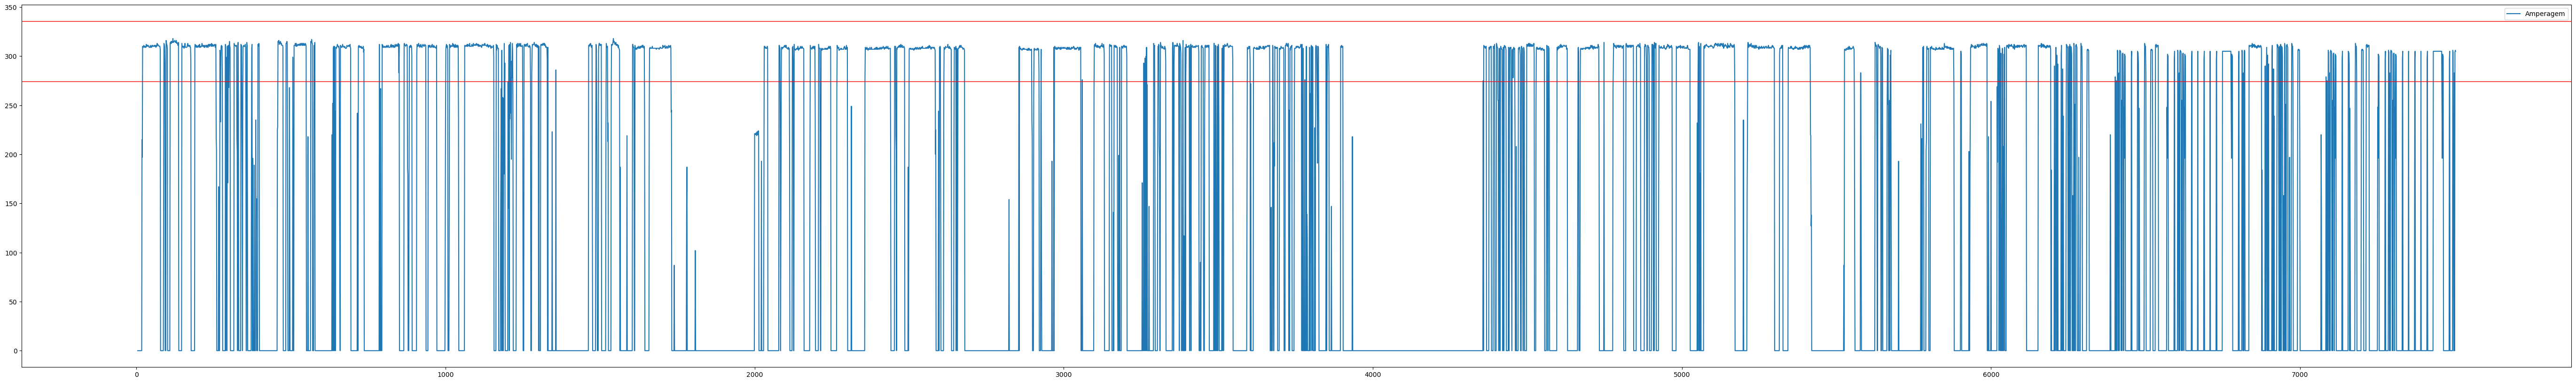

In [17]:
#Plotando gráficos de linha
df.plot(figsize=(70,10))
plt.axhline(linhamax,0,1, color = 'r', **{'lw':1})      
plt.axhline(linhamin,0,1, color = 'r', **{'lw':1})
plt.show()

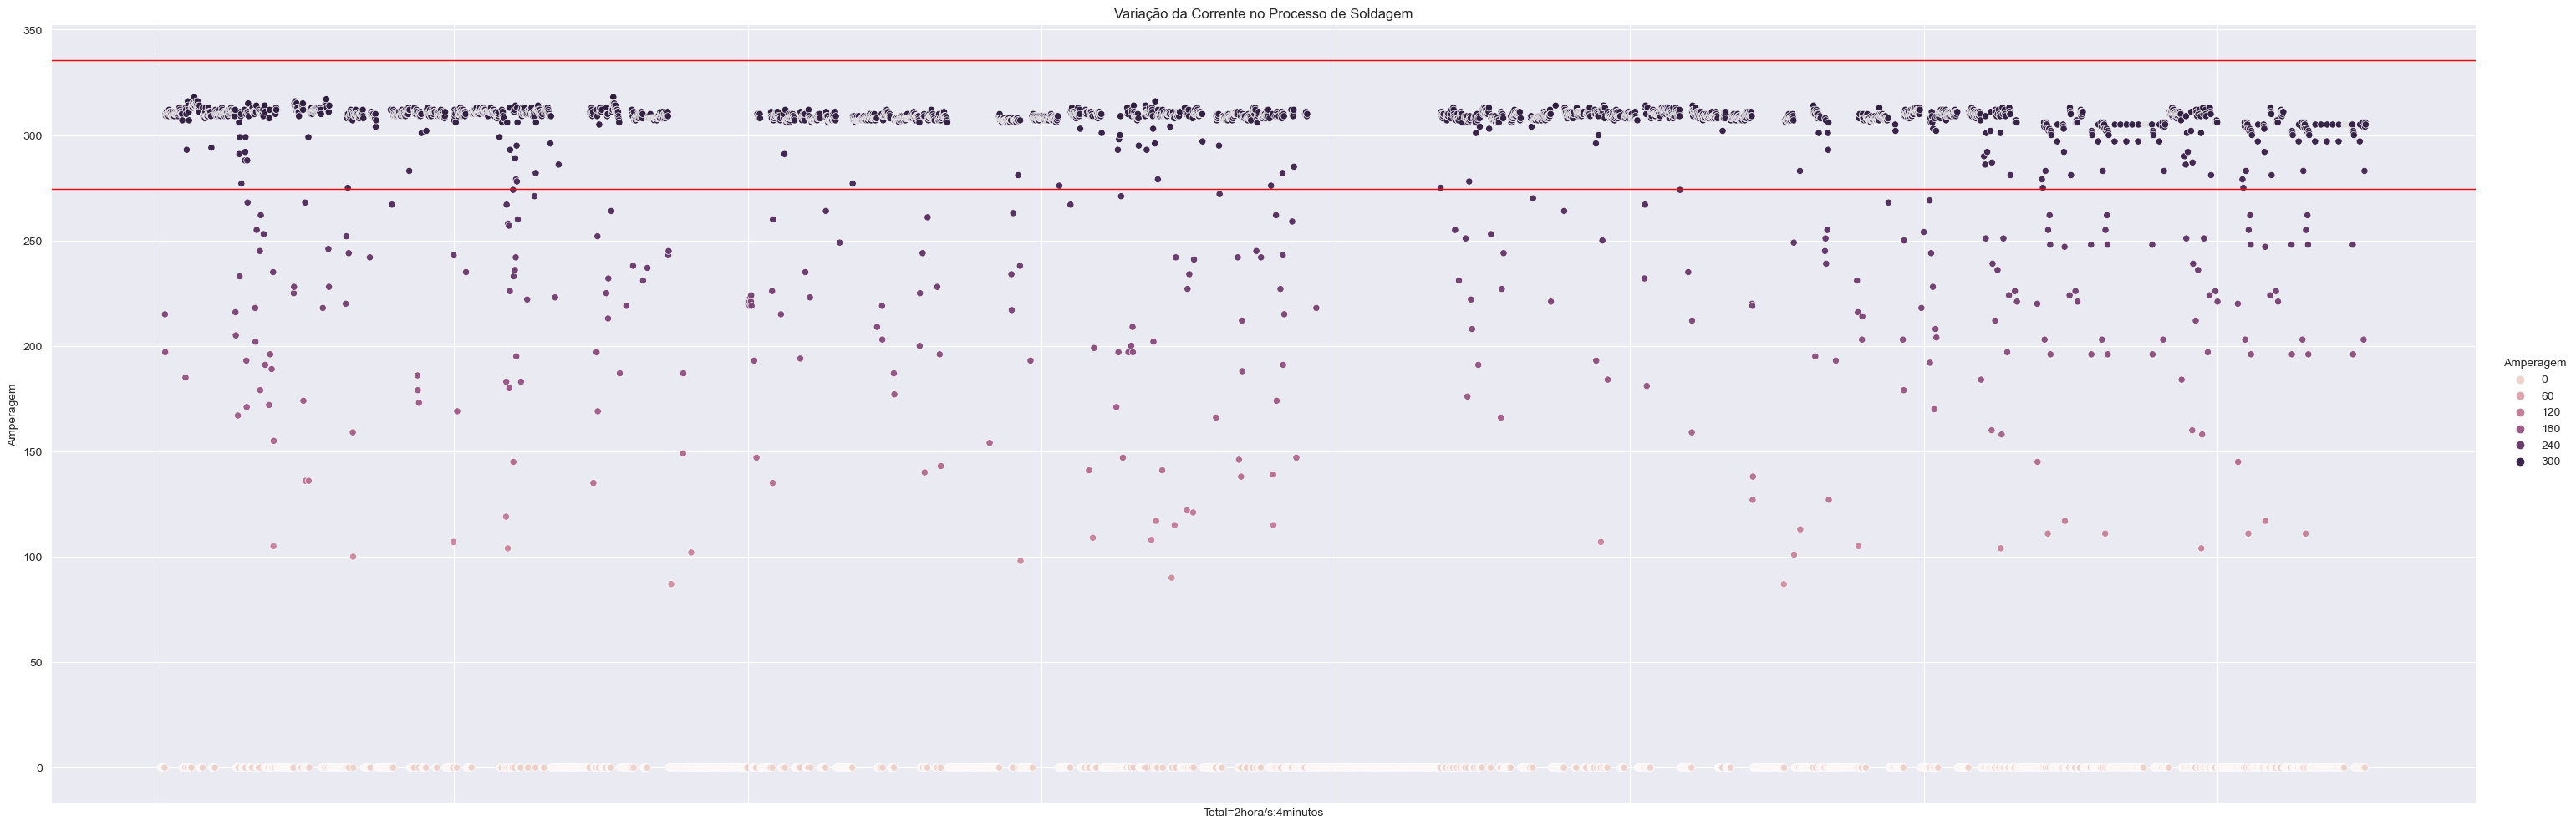

In [18]:
#Plotando gráficos de disperção
sns.set_style('darkgrid')
sns.relplot(data=dff, x='index', y='Amperagem', aspect = 3, height = 10, hue='Amperagem')

plt.title('Variação da Corrente no Processo de Soldagem')
plt.xlabel(total)

plt.axhline(linhamax,0,1, color = 'r', **{'lw':1})
plt.axhline(linhamin,0,1, color = 'r', **{'lw':1})
plt.tick_params(labelbottom = False)

plt.show()

In [19]:
run = df.loc[df['Situação'] == 'trabalhando']
stop= df.loc[df['Situação'] == 'parado']

In [ ]:
run['Situação']=run['Situação'].replace('trabalhando',1)
stop['Situação'] = stop['Situação'].replace('parado',1)

In [21]:
run1 = run['Situação'].sum()

In [22]:
minuto = run1 / 60

hora = minuto // 60
hora = int(hora)

modulo = minuto % 60
modulo = int(modulo)
totalrun1 = f"Arco aberto = {hora}hora/s:{modulo}minutos"


In [23]:
stop1 = stop['Situação'].sum()

In [24]:
minuto = stop1 / 60

hora = minuto // 60
hora = int(hora)

modulo = minuto % 60
modulo = int(modulo)
totalstop1 = f"Arco fechado = {hora}hora/s:{modulo}minutos"


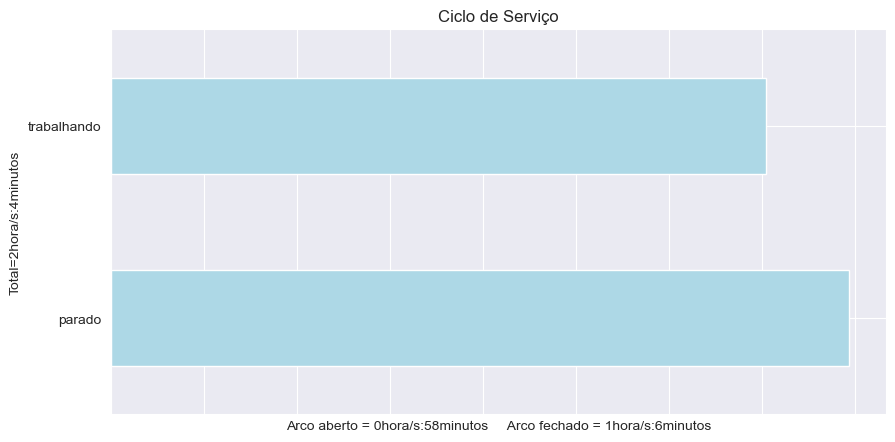

In [25]:
#Plotando gráfico de barras conforme situação
situacao.plot(kind='barh', title = 'Ciclo de Serviço', figsize=(10,5),color='lightblue')
plt.ylabel(f"{total}")
plt.xlabel(f"{totalrun1}     {totalstop1}")
plt.tick_params(labelbottom = False)
plt.show()

...